Import the required libraries and data to create the merged dataframe from previous assignment

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
#Load the file and display top 10 rows
dengue_feature = pd.read_csv("dengue_features_train.csv")
dengue_feature.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,6/4/1990,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,7/2/1990,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [3]:
#To display all the columns in the pandas dataframes like the Correlation Matrix
pd.set_option('display.max_columns',None)

In [4]:
#Rename and merge the two files. Fill the nulls using flood fill
dengue_feature.columns = dengue_feature.columns.str.replace('station','stn')
dengue_feature.columns = dengue_feature.columns.str.replace('reanalysis','re_an')
dengue_feature.columns = dengue_feature.columns.str.replace('humidity','hd')
dengue_feature.columns = dengue_feature.columns.str.replace('precipitation','prec')
dengue_labels = pd.read_csv("dengue_labels_train.csv")
merged = pd.merge(dengue_feature,dengue_labels, on = ['city','year','weekofyear'])
merged = merged.fillna(method='ffill')

In [5]:
#Create a copy of the merged dataset
dup = merged.copy()

In [6]:
#Construct a Correlation Matrix on it
dup.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
year,1.000000,-0.071649,0.200449,0.147472,0.250522,0.279822,0.212180,-0.137600,0.087929,0.137358,0.481219,-0.391338,0.133967,0.339290,0.212180,0.166577,0.490999,0.050090,0.376116,0.226683,-0.211103,0.216200,-0.306806
weekofyear,-0.071649,1.000000,0.023819,0.034657,0.102724,0.064415,0.124856,0.420022,0.457507,0.347098,0.234101,0.179207,0.072231,-0.012214,0.124856,0.349060,0.076091,0.362239,0.021873,0.227319,0.292940,0.063541,0.216452
ndvi_ne,0.200449,0.023819,1.000000,0.824107,0.586109,0.645100,0.195393,-0.331672,-0.038252,0.054772,0.621991,-0.612693,0.193194,0.456352,0.195393,0.091533,0.667052,0.183278,0.657629,0.477253,-0.301203,0.228976,-0.205105
ndvi_nw,0.147472,0.034657,0.824107,1.000000,0.554892,0.651769,0.188579,-0.317921,-0.032159,0.064057,0.606766,-0.589707,0.189160,0.451413,0.188579,0.101519,0.646759,0.199266,0.649027,0.482731,-0.300013,0.213167,-0.168386
ndvi_se,0.250522,0.102724,0.586109,0.554892,1.000000,0.814252,0.083593,-0.159185,0.051295,0.005600,0.470299,-0.411121,0.037521,0.219981,0.083593,0.032210,0.489896,0.089394,0.449198,0.283555,-0.251023,0.131235,-0.213395
ndvi_sw,0.279822,0.064415,0.645100,0.651769,0.814252,1.000000,0.128330,-0.225483,0.024299,0.024638,0.545422,-0.492442,0.103944,0.312778,0.128330,0.057477,0.568326,0.124406,0.544537,0.374184,-0.288346,0.156191,-0.145284
prec_amt_mm,0.212180,0.124856,0.195393,0.188579,0.083593,0.128330,1.000000,-0.015362,0.109151,0.437603,0.285011,-0.120072,0.481093,0.501431,1.000000,0.454162,0.203493,0.230343,0.192150,0.294615,0.080959,0.481349,-0.042712
re_an_air_temp_k,-0.137600,0.420022,-0.331672,-0.317921,-0.159185,-0.225483,-0.015362,1.000000,0.901969,0.528840,0.001759,0.735368,-0.128928,-0.402466,-0.015362,0.507362,-0.277196,0.611060,-0.257840,0.232696,0.717484,-0.173951,0.263487
re_an_avg_temp_k,0.087929,0.457507,-0.038252,-0.032159,0.051295,0.024299,0.109151,0.901969,1.000000,0.614025,0.400625,0.435215,-0.032077,-0.168282,0.109151,0.612167,0.127127,0.742202,0.108604,0.514923,0.578646,-0.050696,0.149274
re_an_dew_point_temp_k,0.137358,0.347098,0.054772,0.064057,0.005600,0.024638,0.437603,0.528840,0.614025,1.000000,0.259867,0.360190,0.432638,0.554573,0.437603,0.997045,-0.030395,0.736519,0.034479,0.492950,0.650818,0.241597,0.139027


### 1.Write a brief statement: Is it required to consider the repeating features in the model? (For example: precipitation_amt_mm and reanalysis_sat_precip_amt_mm. Similarly there are others). List which features you will choose in this model. Select the required columns in the dataframe and drop the others.

Based on the correlation matrix we can see the prec_amt_mm and re_an_sat_precip_amt_mm are having the same values. Hence we are dropping the prec_amt_mm variable. We could also see a correlation value of 0.99 between re_an_specific_hd_g_per_kg and re_an_dew_point_temp_k. We are dropping re_an_specific_hd_g_per_kg variable. The Correlation matrix also tells us the correaltion of other variables with the target variable, total_cases. We are dropping columns that have almost no correlation or negligible correlation i.e less than 0.1. Based on it we are dropping re_an_precip_amt_kg_per_m2, re_an_sat_precip_amt_mm, stn_max_temp_c,stn_precip_mm variables. 

In [7]:
#Drop the variables that have repeating features and have negligible correlation to the target variable
dup.drop(['week_start_date','prec_amt_mm','re_an_specific_hd_g_per_kg','re_an_precip_amt_kg_per_m2','re_an_sat_precip_amt_mm',
          'stn_max_temp_c','stn_precip_mm'],axis=1,inplace=True)

### 2. Preprocess the data
#### 1.Encode the categorical features
#### 2.Abbreviate the column names
#### 3.Standardize the numerical features
#### 4.Handle NaNs (either fill them with Median values or make a better choice if available)
#### 5.Convert percentage to value/100 (check which option gives better result, as-is or divided/100)
#### 6.Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.
#### 7.Make an 80-20 train-test split

We are first abbreviating the column names , handling the NANs by filling it with mean values and then converting the percentahe to value of /100 before we standardize the numerical values. We scale the vegetation features as 0,1 and convert them to integers before we encode the categorical values. We make a 80-20 train-test split at the end.

#### Abbreviating the column names

In [8]:
#Abbreviating the columns further apart from renaming done in previous assignment
dup.columns = dup.columns.str.replace('stn','s')
dup.columns = dup.columns.str.replace('re_an','re')

#### Handling the NANs by filling it with Mean values so that the average/mean of the columns are not changed

In [9]:
#Filling the NANs with Mean values
dup.fillna(dup.mean(), inplace=True)
dup.head(10)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,re_air_temp_k,re_avg_temp_k,re_dew_point_temp_k,re_max_air_temp_k,re_min_air_temp_k,re_relative_hd_percent,re_tdtr_k,s_avg_temp_c,s_diur_temp_rng_c,s_min_temp_c,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,73.365714,2.628571,25.442857,6.900000,20.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,77.368571,2.371429,26.714286,6.371429,22.2,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,82.052857,2.300000,26.714286,6.485714,22.8,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,80.337143,2.428571,27.471429,6.771429,23.3,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,80.460000,3.014286,28.942857,9.371429,23.9,6
5,sj,1990,23,0.196200,0.174850,0.254314,0.181743,299.630000,299.764286,295.851429,302.4,298.1,79.891429,2.100000,28.114286,6.942857,23.9,2
6,sj,1990,24,0.112900,0.092800,0.205071,0.210271,299.207143,299.221429,295.865714,301.3,297.7,82.000000,2.042857,27.414286,6.771429,23.3,4
7,sj,1990,25,0.072500,0.072500,0.151471,0.133029,299.591429,299.528571,296.531429,300.6,298.4,83.375714,1.571429,28.371429,7.685714,22.8,5
8,sj,1990,26,0.102450,0.146175,0.125571,0.123600,299.578571,299.557143,296.378571,302.1,297.7,82.768571,1.885714,28.328571,7.385714,22.8,10
9,sj,1990,27,0.102450,0.121550,0.160683,0.202567,300.154286,300.278571,296.651429,302.3,298.7,81.281429,2.014286,28.328571,6.514286,24.4,6


#### Convert the percentage value to /100

In [10]:
#Converting the percentage value to /100
dup['re_relative_hd_percent'] = dup['re_relative_hd_percent']/100

#### Scaling the numerical features

In [11]:
#Scaling the numerical features by using StandardScaler
cols_to_scale = ["weekofyear",  "re_air_temp_k",
           "re_avg_temp_k",
           "re_dew_point_temp_k",
           "re_max_air_temp_k",
           "re_min_air_temp_k",
           "re_relative_hd_percent",
           "re_tdtr_k",
           "s_avg_temp_c",
           "s_diur_temp_rng_c",
           "s_min_temp_c"]

scale = StandardScaler()

scaled = scale.fit_transform(dup[cols_to_scale])

#### Scaling the vegetation features as 0, 1(0 <= 0.25 and 1 > 0.25)

In [12]:
#Scaling the vegetation features
dup.loc[dup.ndvi_ne <= 0.25,'ndvi_ne'] = 0
dup.loc[dup.ndvi_ne > 0.25,'ndvi_ne'] = 1
dup.loc[dup.ndvi_nw <= 0.25,'ndvi_nw'] = 0
dup.loc[dup.ndvi_nw > 0.25,'ndvi_nw'] = 1
dup.loc[dup.ndvi_se <= 0.25,'ndvi_se'] = 0
dup.loc[dup.ndvi_se > 0.25,'ndvi_se'] = 1
dup.loc[dup.ndvi_sw <= 0.25,'ndvi_sw'] = 0
dup.loc[dup.ndvi_sw > 0.25,'ndvi_sw'] = 1

In [13]:
#Converting it from float to encode it as a categorical feature
dup['ndvi_ne'] = dup['ndvi_ne'].astype('category')
dup['ndvi_nw'] = dup['ndvi_nw'].astype('category')
dup['ndvi_se'] = dup['ndvi_se'].astype('category')
dup['ndvi_sw'] = dup['ndvi_sw'].astype('category')

#### Enocding the categorical features

In [14]:
#Encode all the categorical variables
cols_to_encode = ["city", "ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]
ohe = OneHotEncoder(sparse=False)
encoded = ohe.fit_transform(dup[cols_to_encode])

In [15]:
#Concatenate the scaled and encoded variables to use as training data by storing it as X
X = np.concatenate([encoded, scaled], axis=1)

In [16]:
#Store the target variable total_cases in y 
y = dup[['total_cases']]

In [17]:
#Creating a 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 3. Build a Linear SVR regressor, train the model

In [18]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

#### Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

The metrics chosen here are MAE since it is the metric accepted for the submission. R2 is also chosen as a metric to evaluate since it will tell us how much variance is covered by the model so that we can try and improve it.

In [20]:
#Evaluate using MAE
y_pred = svm_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

13.852310009714735

In [21]:
#Evaluate using R2
r2 = r2_score(y_test,y_pred)
r2

0.2477120724244024

The R2 score suggests that the model covers only 24% of the variance.

#### List the hyper-parameters that can be tuned in Linear SVR. Explain the meaning of each hyper-parameter. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

In LinearSVR we can use the below hyper-parameters to tune:

1. Epsilon - The Epsilon value is the one which determines the width of the street in which the regression line is fit in the middle. The higher the value of the Epsilon the wider the street and lower the Epsilom value the narrower the street. The Linear SVR model tries to fit in as many instances of the training data on the regression line, so if the street is very narrow the model might not be able to fit the instances and if it is too wide it might fit outliers. We must choose it such that it is neither too narrow nor too broad.

2. C value - This is the regularization parameter. The higher the C value, the lesser the boundary violations. Lower C values will result in higher boundary violations, but will generalize better.

3. Loss Function - Different loss functions can result in different results.

4. Maximum Iterations - It defines the maximum iterations the model to be trained and fit.

In [19]:
#Model with Hyper-Parameters tuned like Epsilon value changed, C, max_iter and random_state introduced
svm_reg1 = LinearSVR(epsilon=0.8,C=1.5,random_state=42,max_iter=10000)
svm_reg1.fit(X_train, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.5, dual=True, epsilon=0.8, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=0.0001, verbose=0)

In [23]:
#Evaluate using MAE
y_pred1 = svm_reg1.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1)
mae1

13.632229887811917

In [24]:
#Evaluate using R2
r2_1 = r2_score(y_test,y_pred1)
r2_1

0.26706695468077246

Based on the above, we could see the tuned model acheived an MAE of 13.85 which is better than the original MAE of 13.63 suggesting an improvement of around 0.22. The R2 value shows it now explains 26% of the variance which is an improvement comapred to the 24% variance the initial model covered.

#### Plot Learning curve and provide insights

In [25]:
#Calculate the errors
train_errors, test_errors = [], []
for m in range(1, len(X_train)):
    svm_reg1.fit(X_train[:m], y_train[:m])
    y_train_pred = svm_reg1.predict(X_train[:m])
    y_test_pred = svm_reg1.predict(X_test)
    train_errors.append(mean_absolute_error(y_train[:m], y_train_pred))
    test_errors.append(mean_absolute_error(y_test, y_test_pred))

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

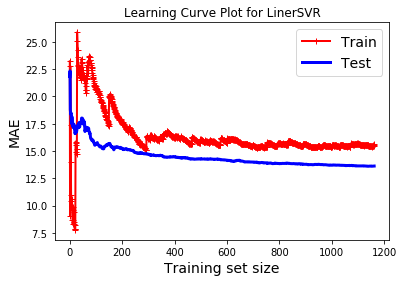

In [26]:
#Plot the Learning Curve
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Learning Curve Plot for LinerSVR")
plt.show()

From the above Learning Curve it is evident the gap between the two curve gets narrower as the Training set size increases suggesting that the model is not overfitting. Since the gap is narrower it suggets the model has low variance which is evident from R2 value and high training error.

### 4.Build a SVR model with Linear Kernel, train the model

In [20]:
#SVR model with Linear Kernel
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

#### Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

The metrics chosen here are MAE since it is the metric accepted for the submission. R2 is also chosen as a metric to evaluate since it will tell us how much variance is covered by the model so that we can try and improve it.

In [28]:
#Evaluate the SVR model with Linear Kernel with MAE
y_svr_pred = svr_linear.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_svr_pred)
mae_svr

13.897281868577913

In [29]:
#Evaluate the R2 of the SVR model with Linear Kernel
r2_svr = r2_score(y_test,y_svr_pred)
r2_svr

0.2421526322760632

The R2 score suggests that the model covers only 24% of the variance.

#### List the hyper-parameters that can be tuned in SVR model with Linear Kernel. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

In SVR model with Linear Kernel we can use the below hyper-parameters to tune:

1. Epsilon - The Epsilon value is the one which determines the width of the street in which the regression line is fit in the middle. The higher the value of the Epsilon the wider the street and lower the Epsilom value the narrower the street. The Linear SVR model tries to fit in as many instances of the training data on the regression line, so if the street is very narrow the model might not be able to fit the instances and if it is too wide it might fit outliers. We must choose it such that it is neither too narrow nor too broad.

2. C value - This is the regularization parameter. The higher the C value, the lesser the boundary violations. Lower C values will result in higher boundary violations, but will generalize better.

3. Maximum Iterations - It defines the maximum iterations the model to be trained and fit.

In [21]:
#Model with Hyper-Parameters tuned like Epsilon value changed, C, max_iter introduced
svr_linear1 = SVR(kernel='linear',epsilon=0.8,C=1.5,max_iter=10000)
svr_linear1.fit(X_train, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.8,
    gamma='auto_deprecated', kernel='linear', max_iter=10000, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
#Evaluate the SVR model with Linear Kernel with MAE
y_svr_pred1 = svr_linear1.predict(X_test)
mae_svr1 = mean_absolute_error(y_test, y_svr_pred1)
mae_svr1

13.648151528489896

In [32]:
#Evaluate the R2 of the SVR model with Linear Kernel
r2_svr1 = r2_score(y_test,y_svr_pred1)
r2_svr1

0.2684727864028459

Based on the above, we could see the tuned model acheived an MAE of 13.89 which is better than the original MAE of 13.64 suggesting an improvement of around 0.25. The R2 value shows it now explains 26% of the variance which is an improvement comapred to the 24% variance the initial model covered.

#### Plot Learning curve and provide insights

In [33]:
#Calculate the errors
train_errors1, test_errors1 = [], []
for m in range(1, len(X_train)):
    svr_linear1.fit(X_train[:m], y_train[:m])
    y_train_pred1 = svr_linear1.predict(X_train[:m])
    y_test_pred1 = svr_linear1.predict(X_test)
    train_errors1.append(mean_absolute_error(y_train[:m], y_train_pred1))
    test_errors1.append(mean_absolute_error(y_test, y_test_pred1))

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

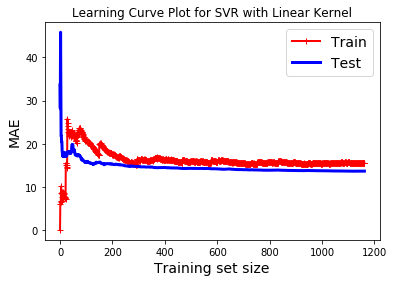

In [34]:
#Plot the Learning Curve
plt.plot(train_errors1, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors1, "b-", linewidth=3, label = "Test")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.title("Learning Curve Plot for SVR with Linear Kernel")
plt.show()

From the above Learning Curve it is evident the gap between the two curve gets narrower as the Training set size increases suggesting that the model is not overfitting. Since the gap is narrower it suggets the model has low variance which is evident from R2 value and high training error.

### 5.Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link

In [22]:
dengue_test = pd.read_csv("dengue_features_test.csv")

We need to perform similar preprocessing of data for test data set as we did for training data set

In [23]:
dengue_test.columns = dengue_test.columns.str.replace('station','stn')
dengue_test.columns = dengue_test.columns.str.replace('reanalysis','re_an')
dengue_test.columns = dengue_test.columns.str.replace('humidity','hd')
dengue_test.columns = dengue_test.columns.str.replace('precipitation','prec')
dengue_test.fillna(method='ffill')

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [24]:
dengue_test.drop(['week_start_date','prec_amt_mm','re_an_specific_hd_g_per_kg','re_an_precip_amt_kg_per_m2',
                  're_an_sat_precip_amt_mm','stn_max_temp_c','stn_precip_mm'],axis=1,inplace=True)

In [25]:
dengue_test.columns = dengue_test.columns.str.replace('stn','s')
dengue_test.columns = dengue_test.columns.str.replace('re_an','re')

In [26]:
dengue_test.fillna(dengue_test.mean(), inplace=True)
dengue_test.head(10)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,re_air_temp_k,re_avg_temp_k,re_dew_point_temp_k,re_max_air_temp_k,re_min_air_temp_k,re_relative_hd_percent,re_tdtr_k,s_avg_temp_c,s_diur_temp_rng_c,s_min_temp_c
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,298.492857,298.550000,294.527143,301.1,296.4,78.781429,3.128571,26.528571,7.057143,21.7
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,298.475714,298.557143,294.395714,300.8,296.7,78.230000,2.571429,26.071429,5.557143,22.2
2,sj,2008,20,-0.001500,0.126803,0.151083,0.091529,299.455714,299.357143,295.308571,302.2,296.4,78.270000,4.428571,27.928571,7.785714,22.8
3,sj,2008,21,0.126050,-0.019867,0.124329,0.125686,299.690000,299.728571,294.402857,303.0,296.9,73.015714,4.342857,28.057143,6.271429,24.4
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,299.780000,299.671429,294.760000,302.3,297.3,74.084286,3.542857,27.614286,7.085714,23.3
5,sj,2008,23,-0.044000,-0.030467,0.132000,0.083529,299.768571,299.728571,295.314286,301.9,297.6,76.557143,2.857143,28.000000,5.171429,25.0
6,sj,2008,24,-0.044300,-0.024925,0.132271,0.159157,300.062857,300.007143,295.650000,302.4,297.5,76.844286,3.157143,27.400000,6.042857,23.3
7,sj,2008,25,0.126050,0.082150,0.144371,0.116729,300.484286,300.578571,295.997143,303.5,297.5,76.870000,3.900000,28.757143,6.985714,24.4
8,sj,2008,26,0.010800,0.049900,0.100571,0.117329,300.601429,300.621429,296.268571,302.5,298.5,77.395714,2.785714,28.657143,6.242857,23.9
9,sj,2008,27,0.072667,0.106660,0.155429,0.164900,300.497143,300.528571,296.411429,302.3,298.7,78.534286,2.228571,28.457143,4.628571,25.0


In [27]:
dengue_test['re_relative_hd_percent'] = dengue_test['re_relative_hd_percent']/100

In [28]:
cols_to_scale = ["weekofyear", "re_air_temp_k",
           "re_avg_temp_k",
           "re_dew_point_temp_k",
           "re_max_air_temp_k",
           "re_min_air_temp_k",
           "re_relative_hd_percent",
           "re_tdtr_k",
           "s_avg_temp_c",
           "s_diur_temp_rng_c",
           "s_min_temp_c"]

scale = StandardScaler()

scaled1 = scale.fit_transform(dengue_test[cols_to_scale])

In [29]:
dengue_test.loc[dengue_test.ndvi_ne <= 0.25,'ndvi_ne'] = 0
dengue_test.loc[dengue_test.ndvi_ne > 0.25,'ndvi_ne'] = 1
dengue_test.loc[dengue_test.ndvi_nw <= 0.25,'ndvi_nw'] = 0
dengue_test.loc[dengue_test.ndvi_nw > 0.25,'ndvi_nw'] = 1
dengue_test.loc[dengue_test.ndvi_se <= 0.25,'ndvi_se'] = 0
dengue_test.loc[dengue_test.ndvi_se > 0.25,'ndvi_se'] = 1
dengue_test.loc[dengue_test.ndvi_sw <= 0.25,'ndvi_sw'] = 0
dengue_test.loc[dengue_test.ndvi_sw > 0.25,'ndvi_sw'] = 1

In [30]:
dengue_test['ndvi_ne'] = dengue_test['ndvi_ne'].astype('category')
dengue_test['ndvi_nw'] = dengue_test['ndvi_nw'].astype('category')
dengue_test['ndvi_se'] = dengue_test['ndvi_se'].astype('category')
dengue_test['ndvi_sw'] = dengue_test['ndvi_sw'].astype('category')

In [31]:
cols_to_encode = ["city","ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]
ohe = OneHotEncoder(sparse=False)
encoded1 = ohe.fit_transform(dengue_test[cols_to_encode])

In [32]:
X1 = np.concatenate([encoded1, scaled1], axis=1)

In [36]:
pred = svm_reg1.predict(X1)
pred = pred.astype('int64')

In [37]:
#Submission File Output
output =  {"city" : dengue_test["city"],
           "year" : dengue_test["year"],
           "weekofyear" : dengue_test["weekofyear"],
           "total_cases" : pred}

df = pd.DataFrame(output, columns= ['city', 'year','weekofyear','total_cases'])
df.to_csv (r'submission_format_Assignment3.csv', index = False, header=True)

### Compare the Model Evaluation metric of SGD (Assignment 2), Linear SVR and SVR with Linear Kernel and state which model performed better along with reason why you consider so.

Comparing the MAE of SGD,Linear SVR and SVR with Linear Kernel the Linear SVR model performed better as it has a lower MAE of 13.63 compared to the other two having 16.82 ad 13.64.

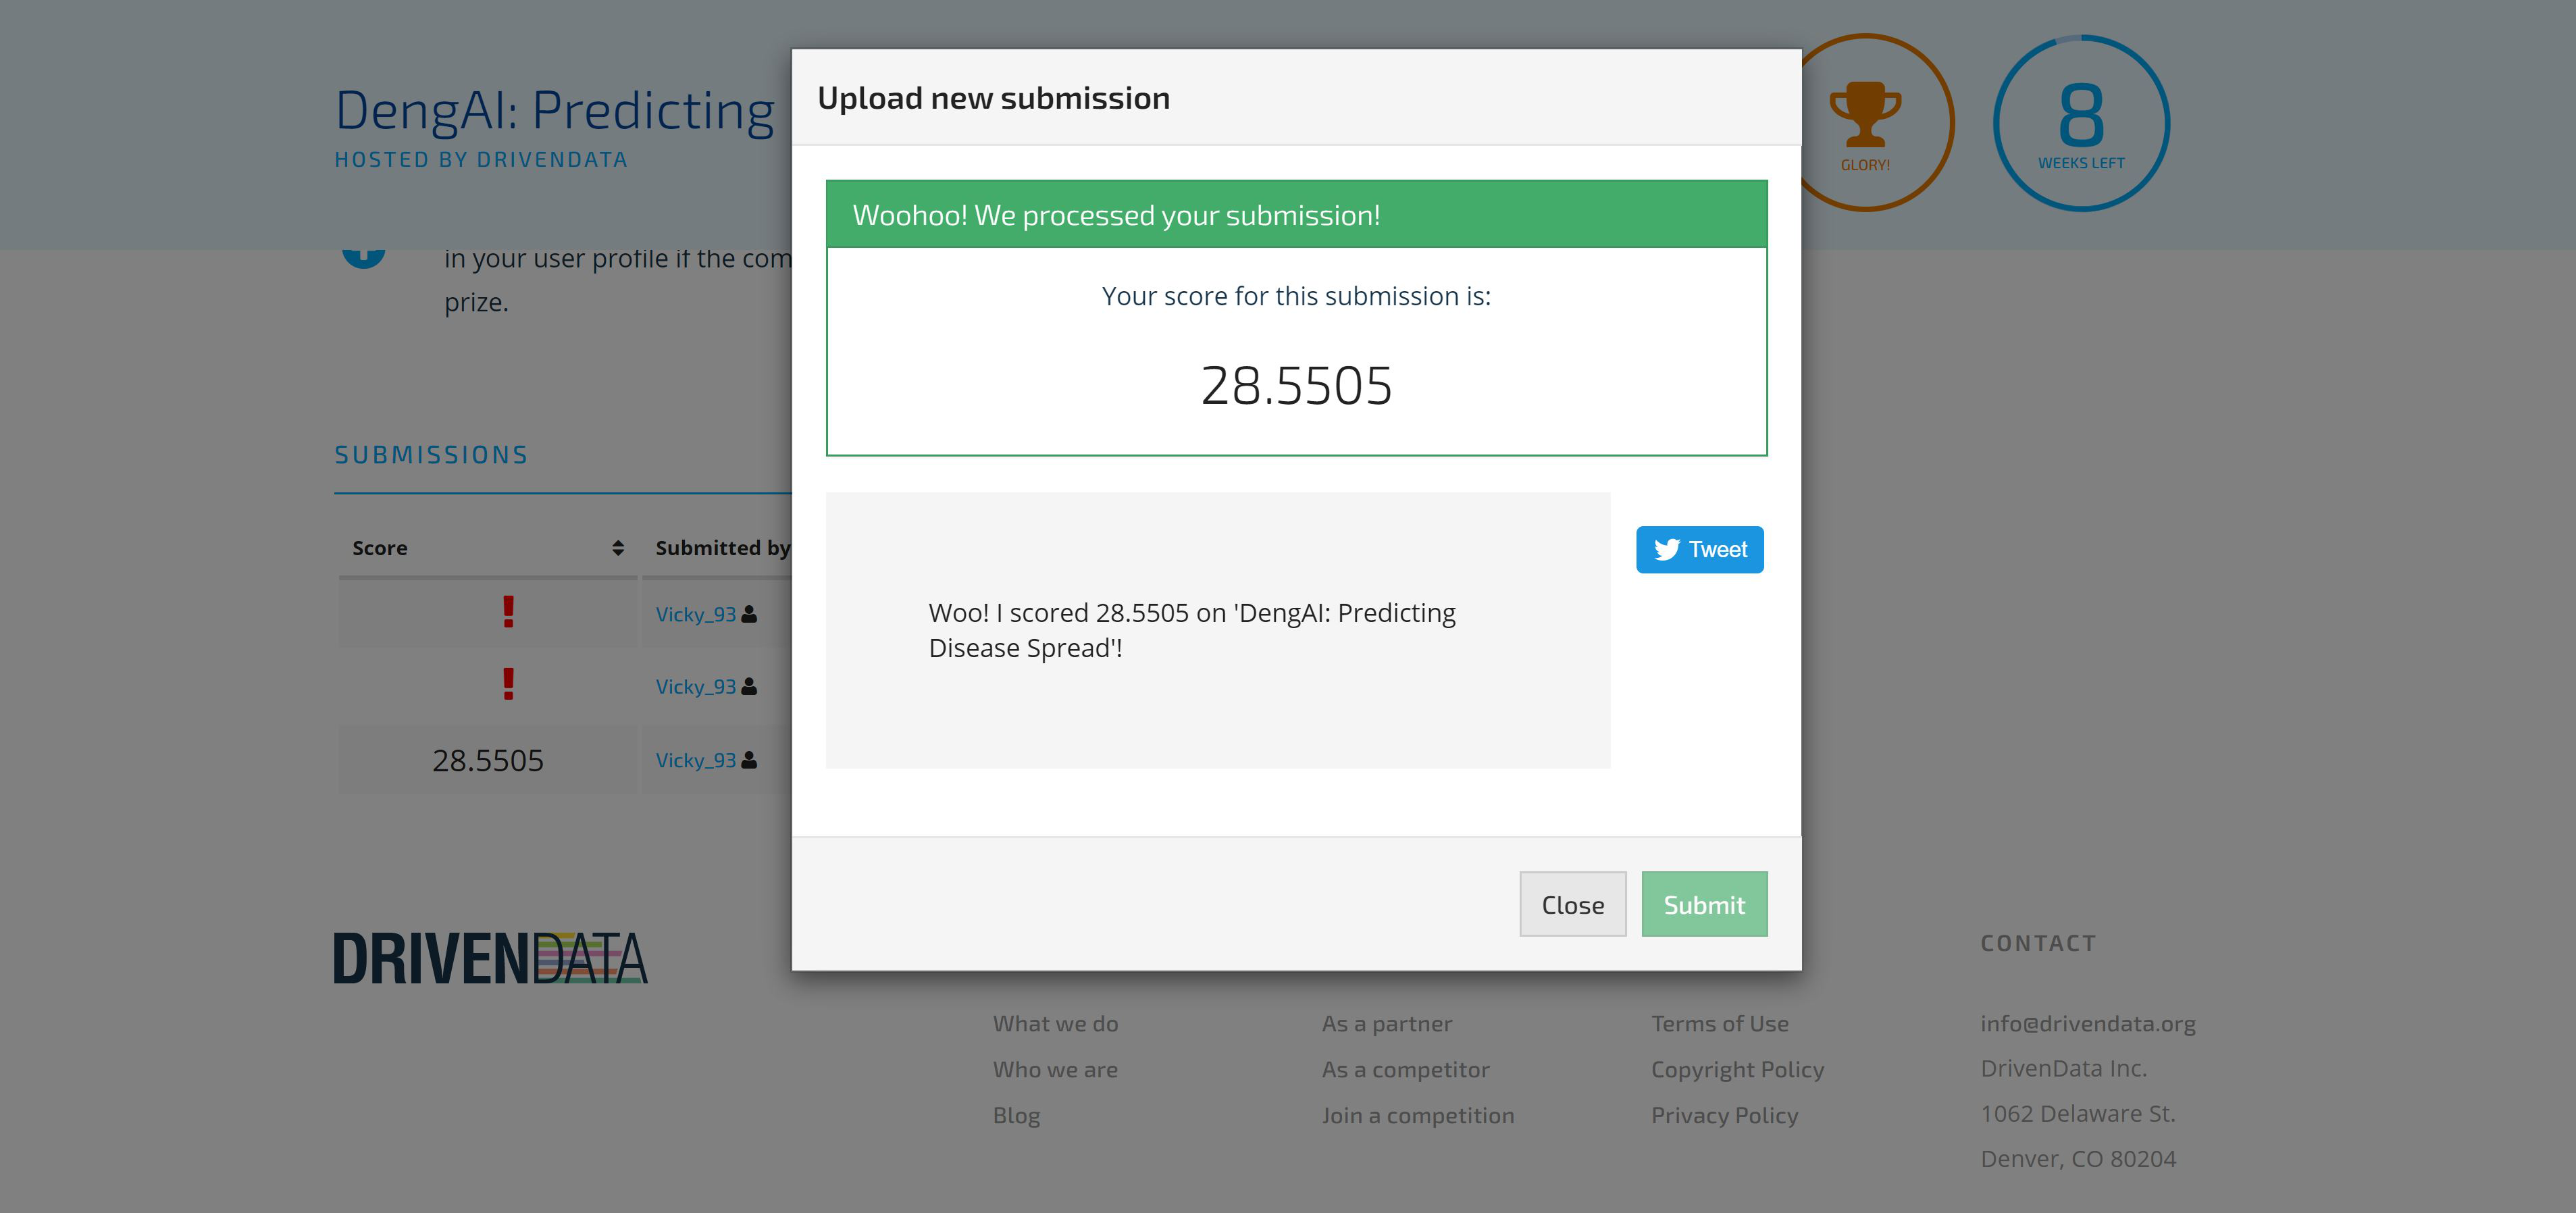

In [41]:
from PIL import Image
img = Image.open("Assignment_3.jpg")
img